$$ Ahmed \space Azzam $$

$$ Flight \space Task  \ $$

# `01` Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

## `i` Data Manipulation Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Preprocessing Libraries

In [3]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE

## `iii` Model Libraries

In [4]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

#SVC
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import confusion_matrix, classification_report

----------------

# `02` Loading Data

In [5]:
df_flight= pd.read_csv('flights.csv')

In [6]:
df_flight.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318


In [7]:
df_flight.shape

(581746, 16)

In [8]:
num_cols=list(df_flight.describe().columns)
object_val=list(set(df_flight.columns)-set(num_cols))

## plot the monthly data

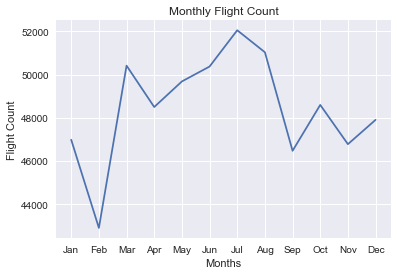

In [9]:
plt.style.use('seaborn')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_flight.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count")
plt.show()

# Notes

- This chart illustrates the flight count distrbution over the months.
- We can observe that February had the lowest number of flights while July recorded the highest number with a gap of 10k flights.
- We can guess that for July the reason might be the summer vacation.

# plot the month distribution on a pie chart

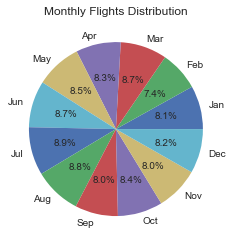

In [10]:
plt.pie(x=df_flight.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct='%1.1f%%', labels=labels)
plt.title("Monthly Flights Distribution")
plt.show()

## Plot the daily flight data

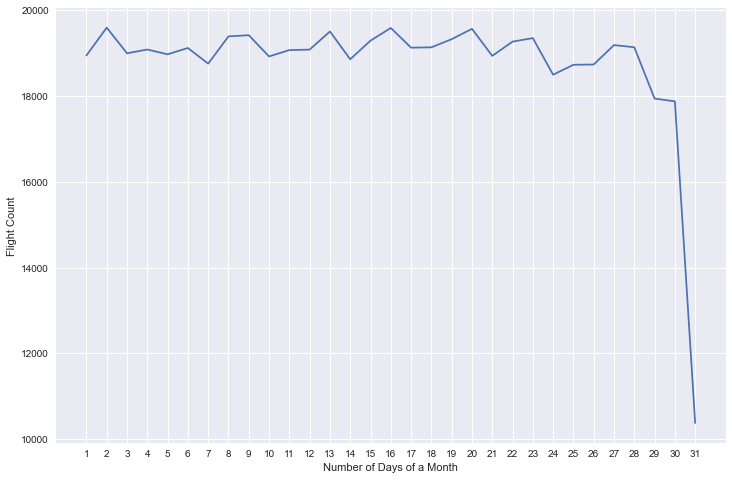

In [11]:
df_flight.groupby('DAY').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Number of Days of a Month")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Flight Count")
plt.show()

# Notes

- The chart above demonstrates the flight count distrbution over the month days.
- We can observe that the count is almost consistent along the month days except for the 31st.
- The reason might be due to the fact that only 7 months have 31 days.

## Plot top 10 'ORIGIN AIRPORTS' on the basis of count

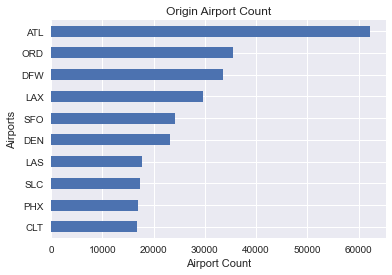

In [12]:
df_flight['ORIGIN_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title("Origin Airport Count")
plt.show()

# Notes

- This bar chart illustrates the top 10 orgin airports based on the flight count.
- As we see Atlanta international airport has the highest number of outgoing flights.

## Plot top 10 'DESTINATION AIRPORTS' on the basis of count

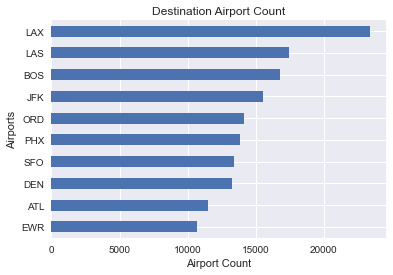

In [13]:
df_flight['DESTINATION_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title("Destination Airport Count")
plt.show()

# Notes

- This bar chart illustrates the top 10 destination  airports based on the flight count.
- As we see Los Angeles International Airport has the highest number of incoming  flights.

## Plot The Distribution of flight_status monthly

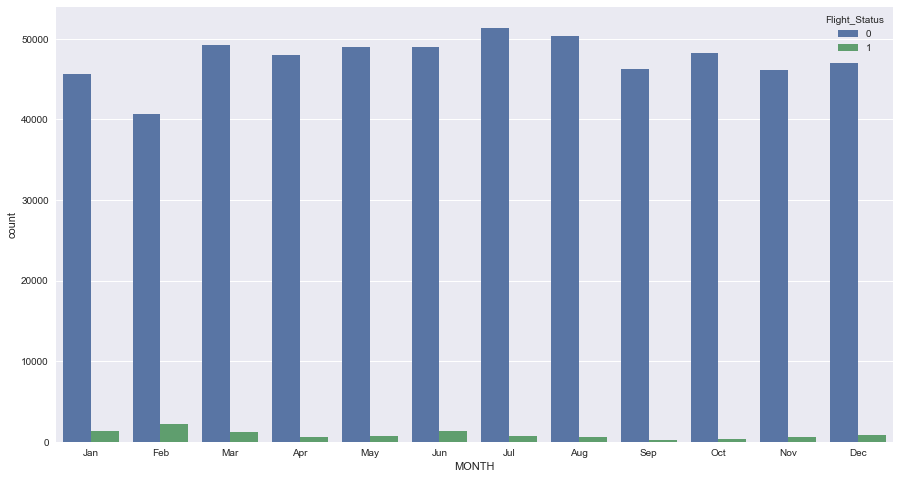

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_flight, x='MONTH', hue='Flight_Status')
plt.xticks(labels=labels, ticks=np.arange(0,12,1))
plt.show()

# Notes

- The chart above demonstrates the distrbution of the flight status along each month.
- September recorded the lowest number of flight cancellations, while February has the highest.

array([[<AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'FLIGHT_NUMBER'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'Flight_Status'}>,
        <AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>],
       [<AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>,
        <AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>],
       [<AxesSubplot:title={'center':'WEATHER_DELAY'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>, <AxesSubplot:>]],
      dtype=object)

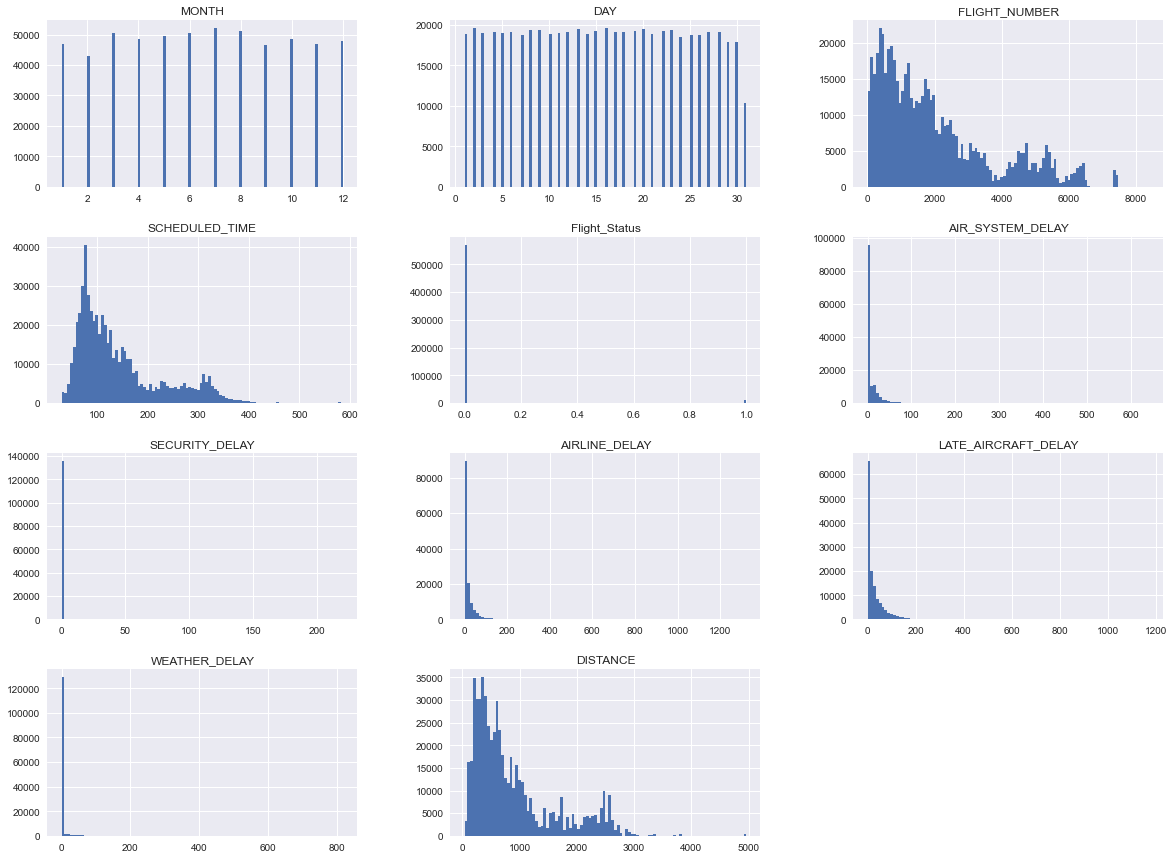

In [15]:
df_flight[num_cols].hist(bins = 100, figsize = (20, 15))

# Notes

- As observed from the above histograms, most flights have short distances, hence short scheduled time.
- That is visible from the right skewness in both histograms. 

## Plot Corr Matrix

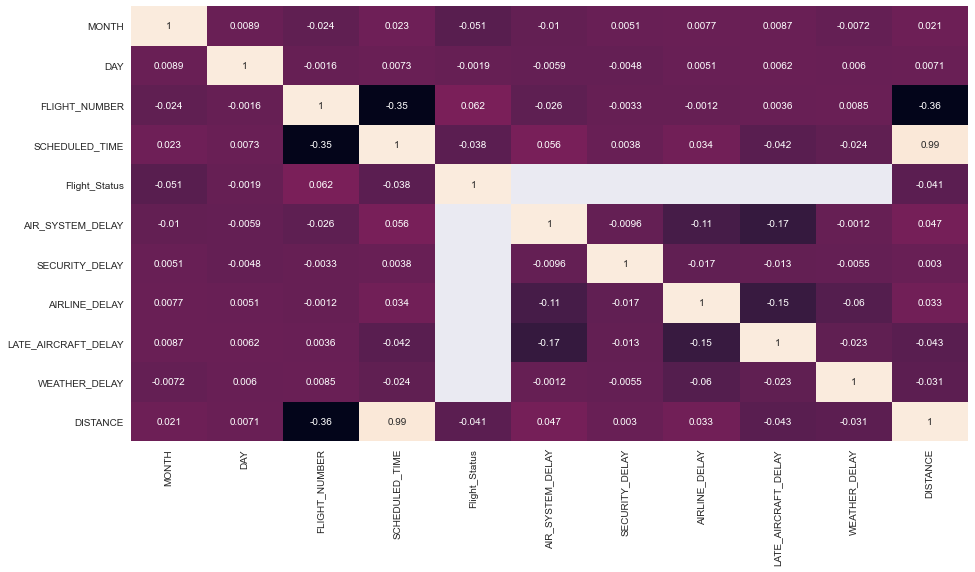

In [16]:
corr_matrix = df_flight.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

# Notes

- The correlation matrix heatmap shows no significant relations between any features.

----------------

# `03` Exploratory Data Analysis (EDA)

# `i` Check and Delete Null Values

In [17]:
null_values=df_flight.isna().sum().reset_index().rename(columns={0:"null_counts"})
null_values[null_values['null_counts']>0].sort_values(by=['null_counts'],ascending=False)

,index,null_counts
9,CANCELLATION_REASON,570758
10,AIR_SYSTEM_DELAY,445682
11,SECURITY_DELAY,445682
12,AIRLINE_DELAY,445682
13,LATE_AIRCRAFT_DELAY,445682
14,WEATHER_DELAY,445682
4,TAIL_NUMBER,1428
7,SCHEDULED_TIME,4


In [18]:
def remove_null_columns(df,null_values):
        null_col=[]
        all_values= df.shape[0]
        return df.drop(columns=list(df[null_values[null_values['null_counts']>all_values*0.6]['index']].columns),axis=1)

In [19]:
df_flight= remove_null_columns(df_flight,null_values)

In [20]:
df_flight.drop(columns=['FLIGHT_NUMBER'], axis=1)

,MONTH,DAY,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,DISTANCE
0,1,1,MQ,N678MQ,DFW,GJT,133.0,0,773
1,1,1,NK,N521NK,ORD,IAH,167.0,0,925
2,1,1,OO,N866AS,LAX,FAT,55.0,0,209
3,1,1,OO,N584SW,LAX,SBP,59.0,0,156
4,1,1,OO,N455SW,CVG,MKE,83.0,0,318
...,...,...,...,...,...,...,...,...,...
581741,12,31,B6,N657JB,LAX,BOS,320.0,0,2611
581742,12,31,B6,N828JB,JFK,PSE,227.0,0,1617
581743,12,31,B6,N913JB,JFK,SJU,221.0,0,1598
581744,12,31,B6,N527JB,MCO,SJU,161.0,0,1189


In [21]:
df_flight.shape

(581746, 10)

In [22]:
df_flight.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,DISTANCE
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,773
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,925
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,209
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,156
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,318


In [23]:
df_flight=df_flight.dropna(axis=0)

In [24]:
null_values=df_flight.isna().sum().reset_index().rename(columns={0:"null_counts"})
null_values[null_values['null_counts']>0].sort_values(by=['null_counts'],ascending=False)

,index,null_counts


## `ii` Correlation metix after removing null values

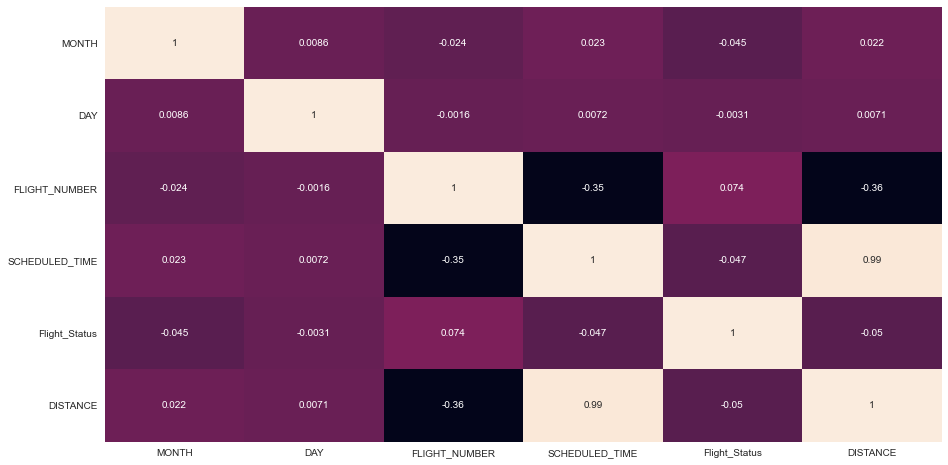

In [25]:
corr_matrix = df_flight.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

## `iii` Label Encoding For Categorical Attribute

In [26]:
num_cols=list(df_flight.describe().columns)
object_val=list(set(df_flight.columns)-set(num_cols))

In [27]:
df_flight[object_val]=df_flight[object_val].apply(LabelEncoder().fit_transform)

## `iiii` Split the data into training and validation data

In [28]:
train_data,val_data= train_test_split(df_flight, test_size= 0.20, random_state=0) 

In [29]:
train_data.shape

(464251, 10)

In [30]:
val_data.shape

(116063, 10)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464251 entries, 373646 to 306774
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                464251 non-null  int64  
 1   DAY                  464251 non-null  int64  
 2   AIRLINE              464251 non-null  int32  
 3   FLIGHT_NUMBER        464251 non-null  int64  
 4   TAIL_NUMBER          464251 non-null  int32  
 5   ORIGIN_AIRPORT       464251 non-null  int32  
 6   DESTINATION_AIRPORT  464251 non-null  int32  
 7   SCHEDULED_TIME       464251 non-null  float64
 8   Flight_Status        464251 non-null  int64  
 9   DISTANCE             464251 non-null  int64  
dtypes: float64(1), int32(4), int64(5)
memory usage: 31.9 MB


In [32]:
train_data.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,DISTANCE
373646,8,20,9,4694,3632,176,291,48.0,0,113
385385,8,27,13,2449,707,155,345,95.0,0,406
40504,1,27,13,4210,3788,236,458,120.0,1,838
411287,9,13,13,459,715,133,507,95.0,0,481
18082,1,12,5,1276,4467,235,488,139.0,0,861


----------------

# `04` Models

## `i` Decision Tree Model

<AxesSubplot:xlabel='Flight_Status', ylabel='count'>

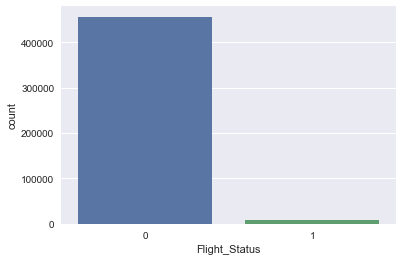

In [33]:
sns.countplot(train_data.Flight_Status)

In [34]:
X_train=train_data.drop(columns=['Flight_Status'],axis=1)
y_train= train_data['Flight_Status']
X_val=val_data.drop(columns=['Flight_Status'],axis=1)
y_val= val_data['Flight_Status']

In [36]:
model=DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

1.0
0.9759182512945556
[[112855   1330]
 [  1465    413]]



              precision    recall  f1-score   support

           0       0.99      0.99      0.99    114185
           1       0.24      0.22      0.23      1878

    accuracy                           0.98    116063
   macro avg       0.61      0.60      0.61    116063
weighted avg       0.98      0.98      0.98    116063



# Notes

- We used decision tree model with class weight parameter set to balanced to mitigate the imbalance in dataset.
- The classification score was highly affected by the imbalance and we can see that in the precision, recall, and f1 score of the minority class (cancelled flight).
- However this score is the best we could get through all the models.

##  Decision Tree Model With OverSampling

In [37]:
oversampling=SMOTE()
X_train_resample,y_train_resample=oversampling.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Flight_Status', ylabel='count'>

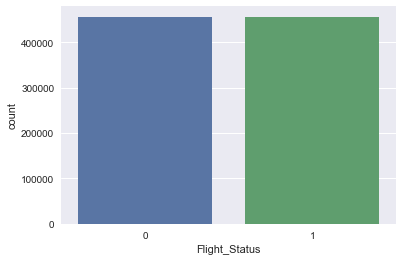

In [38]:
import seaborn as sns
sns.countplot(y_train_resample)

In [39]:
model=DecisionTreeClassifier()
model.fit(X_train_resample,y_train_resample)
print(model.score(X_train_resample,y_train_resample))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.9998915836021841
0.9528187277599235
[[110241   3944]
 [  1532    346]]



              precision    recall  f1-score   support

           0       0.99      0.97      0.98    114185
           1       0.08      0.18      0.11      1878

    accuracy                           0.95    116063
   macro avg       0.53      0.57      0.54    116063
weighted avg       0.97      0.95      0.96    116063



# Notes

- As an alternative to balanced class weight parameter, we tried using oversampling technique to handle the imbalance.
- However, due to the huge gap between the records in the two classes, the model performance got worse as expected. 

## `ii` Logistic Regression

In [40]:
train_data,val_data= train_test_split(df_flight, test_size= 0.20, random_state=0) 

- Shapiro test to check if feature is normaly distributed or not 

In [41]:
def check_normal_dist_shapiro(df,num_cols,alpha = 0.01):
    feats_std_scale = []
    feats_min_max_scale = []
    sample_data  = df.sample(replace = False, n= 500)
    for col in num_cols:
        stat, p = shapiro(sample_data[col])
        if p>alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)
    return feats_min_max_scale,feats_std_scale

In [42]:
feats_min_max_scale,feats_std_scale =check_normal_dist_shapiro(train_data,num_cols)

In [43]:
print(feats_min_max_scale)
print(feats_std_scale)

['MONTH', 'DAY', 'FLIGHT_NUMBER', 'SCHEDULED_TIME', 'Flight_Status', 'DISTANCE']
[]


In [44]:
min_max_scaler = MinMaxScaler()
train_data[num_cols]=min_max_scaler.fit_transform(train_data[num_cols])
val_data[num_cols]= min_max_scaler.transform(val_data[num_cols])

In [45]:
train_data.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,DISTANCE
373646,0.636364,0.633333,9,0.631579,3632,176,291,0.032316,0.0,0.009397
385385,0.636364,0.866667,13,0.329385,707,155,345,0.116697,0.0,0.069254
40504,0.000000,0.866667,13,0.566429,3788,236,458,0.161580,1.0,0.157508
411287,0.727273,0.400000,13,0.061516,715,133,507,0.116697,0.0,0.084576
18082,0.000000,0.366667,5,0.171490,4467,235,488,0.195691,0.0,0.162206


In [46]:
X_train=train_data.drop(columns=['Flight_Status'],axis=1)
y_train= train_data['Flight_Status']
X_val=val_data.drop(columns=['Flight_Status'],axis=1)
y_val= val_data['Flight_Status']

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))


0.9834615326622883
0.9838191327124062
[[114185      0]
 [  1878      0]]



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    114185
         1.0       0.00      0.00      0.00      1878

    accuracy                           0.98    116063
   macro avg       0.49      0.50      0.50    116063
weighted avg       0.97      0.98      0.98    116063



# Notes

- We also tried using logistic regression model to classify the data.
- The model performance was much worse than decision tree model and the model classified all the records as the majority class  (Not cancelled).

##  Logistic Regression with oversampling

In [48]:
oversampling=SMOTE()
X_train_resample,y_train_resample=oversampling.fit_resample(X_train,y_train)

In [49]:
model = LogisticRegression()
model.fit(X_train_resample,y_train_resample)
print(model.score(X_train_resample,y_train_resample))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.6630845450782241
0.6673789235156768
[[76296 37889]
 [  716  1162]]



              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80    114185
         1.0       0.03      0.62      0.06      1878

    accuracy                           0.67    116063
   macro avg       0.51      0.64      0.43    116063
weighted avg       0.98      0.67      0.79    116063



# Notes

- Using oversampling technique along with logistic regression model, we noticed a decline in the model performance for the majority class with a slight improvement in the minority class recall.
- The model performance was not satisfactory even with oversampling.

##  `iii` Support Vector Classifier

In [50]:
model=SVC()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.9834615326622883
0.9838191327124062
[[114185      0]
 [  1878      0]]



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    114185
         1.0       0.00      0.00      0.00      1878

    accuracy                           0.98    116063
   macro avg       0.49      0.50      0.50    116063
weighted avg       0.97      0.98      0.98    116063



# Notes

- The support vector classifier performance was not any different from logistic regression model.
- The model classified all the records as majority class (Not cancelled).

In [51]:
# from sklearn.model_selection import GridSearchCV
# tree_para = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
# clf = GridSearchCV(SVC(), tree_para)
# clf.fit(X_train,y_train)
# print(clf.score(X_train,y_train))
# pred=clf.predict(X_val)
# print(clf.score(X_val,y_val))
# print(confusion_matrix(y_val,pred))
# print("\n\n")
# print(classification_report(y_val,pred))

## Notes

- I dropped Flight_Number column because I believe every flight has a unique number, so it is not effective.
- I dropped CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY and WEATHER_DELAY columns because they have more than 80% of null values.
- I used label encoding instead of one hot encoding because my computer resoures dosen't fit.
- Decision Tree model is the best model of used models.
- I tried to use grid search for SVC to get best paramters but unfortunately it takes much time because of my computer resourses.

---------------

$$ Submitted \space by: \space Ahmed \space Azzam $$